# Módulo 1: Introducción a OpenCV para Ingeniería Agropecuaria

**Curso:** Visión Computacional Aplicada a la Ingeniería Agropecuaria  
**Profesor:** Marco Julio Cañas  
**Herramientas:** Python, OpenCV, NumPy, Matplotlib, Pandas, ipywidgets  

---



## 🎯 Objetivos de aprendizaje
1. Comprender el significado de un píxel como vector en $\mathbb{R}^3$ (espacio RGB).  
2. Cargar y visualizar imágenes agrícolas usando OpenCV y Matplotlib.  
3. Realizar transformaciones básicas: escala de grises, umbralización y detección de bordes.  
4. Aplicar histogramas de color y segmentación para interpretar áreas de cultivo.  
5. Implementar scripts reproducibles en Jupyter con enfoque en Ciencia Abierta.  

---



## 🧩 Concepto base
En el contexto agropecuario, una imagen satelital o de dron puede representarse como una **matriz de píxeles**, donde cada píxel es un vector:
$$
p_{ij} = (R_{ij}, G_{ij}, B_{ij}) \in \mathbb{R}^3
$$

Este vector contiene la información de color y permite medir propiedades del cultivo como el verdor, el nivel de estrés hídrico o la cobertura vegetal.

---


In [2]:
# %% Importación de librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import pandas as pd

print("Librerías cargadas correctamente.")


Librerías cargadas correctamente.


## 🌾 1. Cargar y visualizar una imagen de cultivo

En esta primera actividad, exploramos cómo leer una imagen de un cultivo y cómo visualizarla tanto con OpenCV (BGR) como con Matplotlib (RGB).


In [17]:
# %% Cargar y mostrar imagen de cultivo
img = cv2.imread('istockphoto-2162067357-1024x1024.jpg')


In [19]:
img.ndim

3

Perfecto, Marco Julio 👨🏻‍🏫🌱

En OpenCV, una imagen cargada con

```python
img = cv2.imread('istockphoto-2162067357-1024x1024.jpg')
```

se almacena como un **arreglo NumPy tridimensional** (matriz de píxeles):

* La primera dimensión corresponde a las filas (alto o eje **y**).
* La segunda a las columnas (ancho o eje **x**).
* La tercera a los canales de color (B, G, R).

---

### 🧩 **Sentencia para acceder a un píxel específico**

Por ejemplo, para acceder al píxel ubicado en la fila 100 y columna 200:

```python
pixel = img[100, 200]
print(pixel)
```

---

### 📊 **Salida esperada**

Algo como:

```python
[123 205  45]
```

Esto corresponde a los **valores B, G y R** (azul, verde y rojo) de ese píxel.

---

### 🎨 **Para acceder a cada componente por separado**

```python
blue  = img[100, 200, 0]  # Canal azul
green = img[100, 200, 1]  # Canal verde
red   = img[100, 200, 2]  # Canal rojo
```

---

### ✅ **Ejemplo completo**

```python
import cv2

img = cv2.imread('istockphoto-2162067357-1024x1024.jpg')

# Acceder a un píxel en (100, 200)
pixel = img[100, 200]
blue, green, red = pixel

print(f"Píxel (100,200) en BGR: {pixel}")
print(f"Azul: {blue}, Verde: {green}, Rojo: {red}")
```

---

¿Quieres que te dé una visualización interactiva (con `matplotlib` y `ipywidgets`) para que los estudiantes seleccionen un píxel con el mouse y vean su vector RGB en tiempo real?


Excelente, Marco Julio 👨🏻‍🏫✨

Aquí tienes un **script interactivo en Python**, ideal para usarlo en un **Jupyter Notebook** dentro de tu curso.
Permite a los estudiantes **seleccionar con el mouse un píxel de la imagen** y **ver su vector RGB en tiempo real**, reforzando la idea de que cada píxel es un **vector en** $\mathbb{R}^3$.

---

### 🧠 **Actividad interactiva: Cada píxel como vector en ℝ³**

```python
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

# 1️⃣ Cargar la imagen con OpenCV (en formato BGR)
img = cv2.imread('istockphoto-2162067357-1024x1024.jpg')

# 2️⃣ Convertir de BGR a RGB para visualización con matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3️⃣ Mostrar la imagen
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Haz clic sobre la imagen para obtener el vector RGB de un píxel")
plt.axis('on')
plt.show()

# 4️⃣ Función para acceder al píxel y mostrar su vector RGB
def mostrar_pixel(x=100, y=100):
    # Verificar que las coordenadas estén dentro de los límites
    h, w, _ = img_rgb.shape
    x = min(max(0, x), w-1)
    y = min(max(0, y), h-1)
    
    pixel = img_rgb[y, x]
    r, g, b = pixel
    
    print(f"Coordenadas (x={x}, y={y})")
    print(f"Vector RGB = ({r}, {g}, {b})")
    
    # Mostrar el color del píxel
    plt.figure(figsize=(2,2))
    plt.imshow([[pixel/255]])
    plt.title(f"Color del píxel en (x={x}, y={y})")
    plt.axis('off')
    plt.show()

# 5️⃣ Widget interactivo para explorar píxeles
h, w, _ = img_rgb.shape
interact(mostrar_pixel, x=(0, w-1), y=(0, h-1))
```

---

### 🧩 **Explicación para tus estudiantes**

* Cada **píxel** se representa como un **vector tridimensional**:
  [
  \vec{p} = (R, G, B) \in \mathbb{R}^3
  ]
* Al mover los controles `x` y `y`, el widget muestra:

  * Las **coordenadas** del píxel.
  * Su **vector RGB**.
  * El **color visualizado** del píxel.

---

### 🌱 **Idea pedagógica adicional**

Puedes pedirles a tus estudiantes que:

* Elijan 5 píxeles distintos.
* Registren sus vectores RGB.
* Calculen manualmente la **distancia euclidiana** entre ellos:
  [
  d = \sqrt{(R_2 - R_1)^2 + (G_2 - G_1)^2 + (B_2 - B_1)^2}
  ]
  para **comparar la similitud de colores** en el espacio de $\mathbb{R}^3$.

---

¿Quieres que te agregue una **versión extendida** de esta actividad donde los estudiantes puedan **hacer clic directamente sobre la imagen** (sin usar sliders) para obtener el vector RGB?


Perfecto, Marco Julio 👨🏻‍🏫🌽

Aquí tienes la **versión extendida e interactiva** del ejercicio donde los estudiantes pueden **hacer clic directamente sobre la imagen** para obtener el **vector RGB** del píxel seleccionado.
Es ideal para usar en un **Jupyter Notebook** dentro del curso *OpenCV para Ingeniería Agropecuaria*.

---



## 🧠 Actividad: Cada píxel como vector en ℝ³ (clic interactivo)

```python
# %% Importar librerías
import cv2
import matplotlib.pyplot as plt
import numpy as np

# %% 1️⃣ Cargar imagen
img = cv2.imread('istockphoto-2162067357-1024x1024.jpg')
if img is None:
    raise FileNotFoundError("⚠️ No se encontró la imagen. Asegúrate de que el archivo esté en el mismo directorio del notebook.")

# %% 2️⃣ Convertir BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# %% 3️⃣ Crear la figura
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img_rgb)
ax.set_title("Haz clic sobre la imagen para obtener el vector RGB del píxel")
ax.axis("on")

# %% 4️⃣ Función manejadora del evento de clic
def mostrar_vector_rgb(event):
    # Solo responder si se hace clic dentro del área de la imagen
    if event.xdata is not None and event.ydata is not None:
        x = int(event.xdata)
        y = int(event.ydata)

        # Obtener el vector RGB del píxel
        pixel = img_rgb[y, x]
        r, g, b = pixel

        print(f"\n📍 Coordenadas (x={x}, y={y})")
        print(f"🧩 Vector RGB = ({r}, {g}, {b})")

        # Mostrar el color correspondiente
        color_patch = np.ones((100, 100, 3), dtype=np.uint8) * pixel
        plt.figure(figsize=(1.5, 1.5))
        plt.imshow(color_patch)
        plt.axis('off')
        plt.title(f"Color del píxel ({x},{y})")
        plt.show()

# %% 5️⃣ Conectar el evento de clic
fig.canvas.mpl_connect('button_press_event', mostrar_vector_rgb)

plt.show()
```

---



## 🧩 Explicación conceptual para tus estudiantes

1. **Cada píxel** de una imagen digital puede representarse como un **vector tridimensional**
   $$
   \vec{p} = (R, G, B) \in \mathbb{R}^3
   $$
   donde:

   * ( R ) = intensidad del rojo (0–255)
   * ( G ) = intensidad del verde (0–255)
   * ( B ) = intensidad del azul (0–255)

2. Cuando haces clic sobre la imagen:

   * Obtienes las **coordenadas (x, y)** del píxel.
   * Se muestra el **vector RGB** correspondiente.
   * Se visualiza un pequeño recuadro con el **color de ese píxel**.

---

## 🌾 Actividades sugeridas

1. **Actividad 1:** Selecciona 5 píxeles de zonas distintas del cultivo (por ejemplo, hojas, suelo, cielo, tallo).
2. **Actividad 2:** Registra sus vectores RGB.
3. **Actividad 3:** Calcula las **distancias euclidianas** entre pares de píxeles para analizar la similitud de colores.
   [
   d = \sqrt{(R_2 - R_1)^2 + (G_2 - G_1)^2 + (B_2 - B_1)^2}
   ]
4. **Actividad 4:** Discute qué tan diferentes son las zonas del cultivo en el espacio de color RGB y qué podría implicar eso para el análisis de salud vegetal.

---

¿Deseas que te genere **una segunda parte del módulo**, donde se explique cómo **dividir la imagen en canales (R, G, B)** y **analizar sus histogramas** con `matplotlib` y `cv2.split()`?
Eso serviría como continuación natural para el Módulo 1.


In [ ]:

# Conversión a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.title("Imagen de cultivo - Espacio RGB")
plt.axis('off')
plt.show()


## 📊 2. Análisis de intensidades y vectores de color

Cada píxel tiene valores R, G y B. Analicemos las estadísticas básicas y los histogramas.


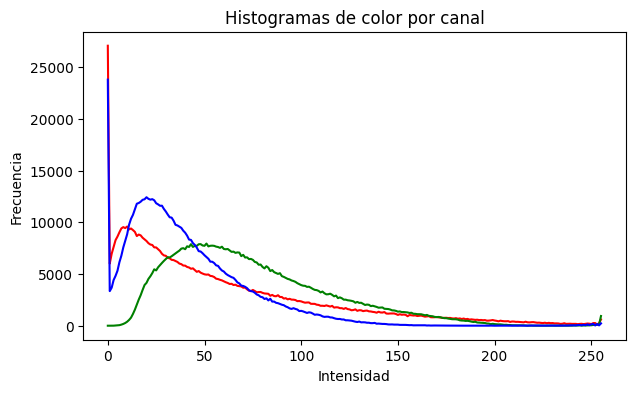

In [12]:
# %% Histogramas de color
color = ('r','g','b')
plt.figure(figsize=(7,4))
for i, col in enumerate(color):
    hist = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.plot(hist, color=col)
plt.title("Histogramas de color por canal")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.show()


## 🧮 3. Conversión a escala de grises y filtrado

Esta operación reduce la información a una sola dimensión, útil para conteo de hojas, semillas o detección de patrones estructurales.


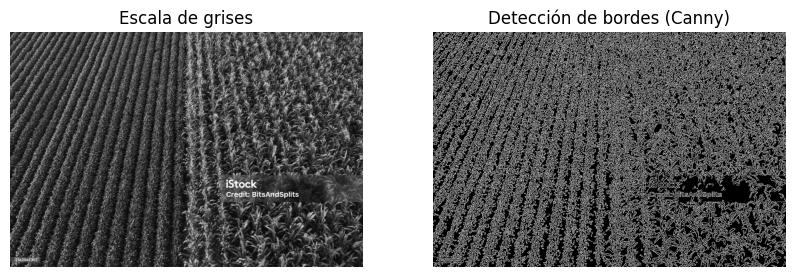

In [13]:
# %% Escala de grises y bordes
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 80, 200)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Escala de grises")
ax[0].axis('off')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title("Detección de bordes (Canny)")
ax[1].axis('off')
plt.show()


## 🎚️ 4. Interacción con umbralización

Permite explorar diferentes valores de umbral para segmentar zonas del cultivo.


In [14]:
# %% Umbralización interactiva
@interact(threshold=FloatSlider(min=0, max=255, step=5, value=100))
def threshold_demo(threshold):
    ret, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.title(f"Umbral: {threshold}")
    plt.axis('off')
    plt.show()


interactive(children=(FloatSlider(value=100.0, description='threshold', max=255.0, step=5.0), Output()), _dom_…

## 🌱 5. Segmentación basada en color (HSV)

El espacio HSV separa tono, saturación y brillo, lo que facilita segmentar regiones verdes (vegetación).


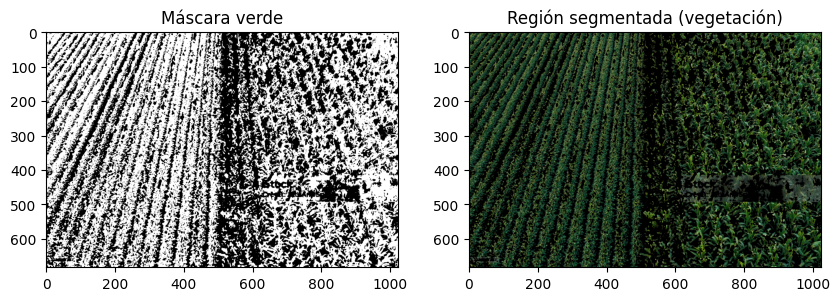

In [16]:
# %% Segmentación en HSV
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
res = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Máscara verde")
ax[1].imshow(res)
ax[1].set_title("Región segmentada (vegetación)")
plt.savefig(r"C:\Users\marco\Downloads\mascara_region_segmentada.png")
plt.show()


## 📘 Conclusión

El estudiante reconoce que:
- Cada píxel es un vector con significado físico (reflexión de la luz).
- La interpretación RGB/HSV facilita la detección de vegetación.
- Python y OpenCV permiten construir algoritmos replicables para monitoreo agrícola.

---
